In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the red-wine.csv file into a DataFrame
path = "/content/drive/MyDrive/faithful.csv"
df = pd.read_csv(path)


Problem 1

Problem 1a 

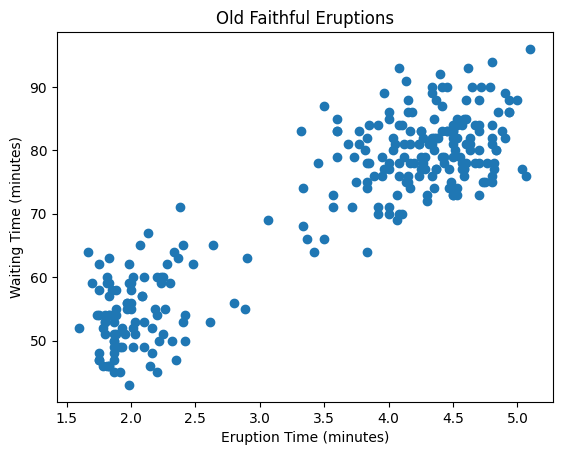

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
plt.scatter(df['eruptions'], df['waiting'])

# title and labels
plt.title('Old Faithful Eruptions')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')

plt.show()

Problem 1b - A cluster is a "blob" of many data points that are close together, with regions of fewer data points between it and other "blob"/clusters. From the plot one can observe that there are "2 CLUSTERS" 

Problem 1c 
Hierarchical clustering is a sort of unsupervised machine learning method that groups data points based on their similarity into a hierarchy of clusters. The method first treats each data point as its own cluster before joining the smaller clusters that share the most characteristics into larger clusters. Until a stopping criterion is satisfied or until all data points are members of one cluster, the process is repeated. 

Calculating the distance or similarity between each pair of data points, treating each data point as a separate cluster, and recalculating the distance or similarity between the new cluster and the other clusters are the steps of the hierarchical clustering algorithm.  The above steps should be repeated until all the data points belong to a single cluster or the stopping criteria is met. 

As the clusters in the scatter plot are clearly defined, the hierarchical algorithm is a good choice. 

Furthermore, hierarchical clustering is helpful when there are important relationships between clusters and when the number of clusters is unknown in advance.




Problem 2

Problem 2a

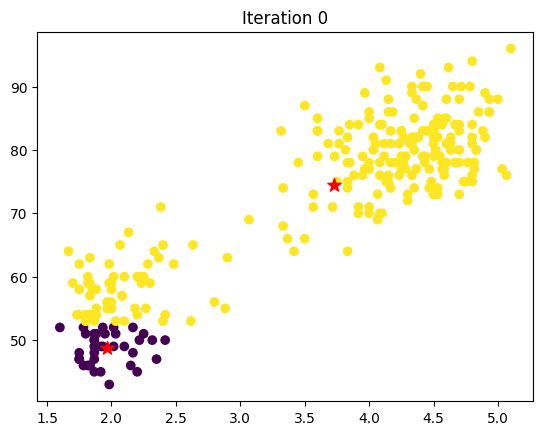

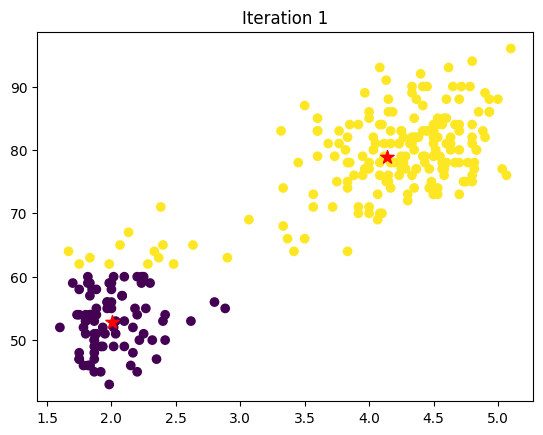

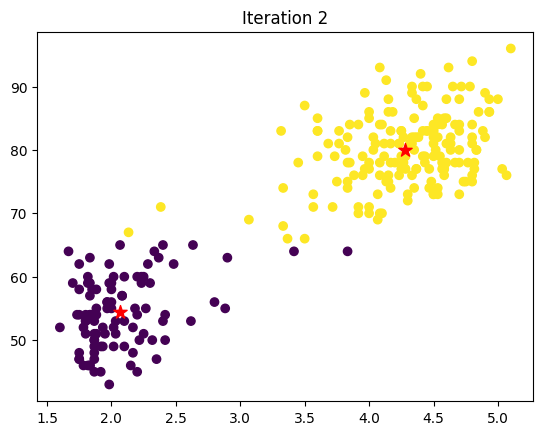

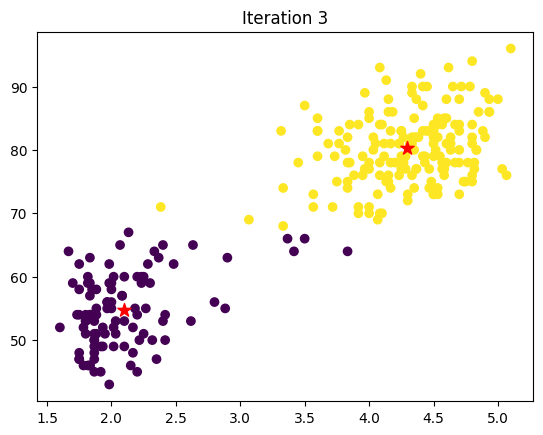

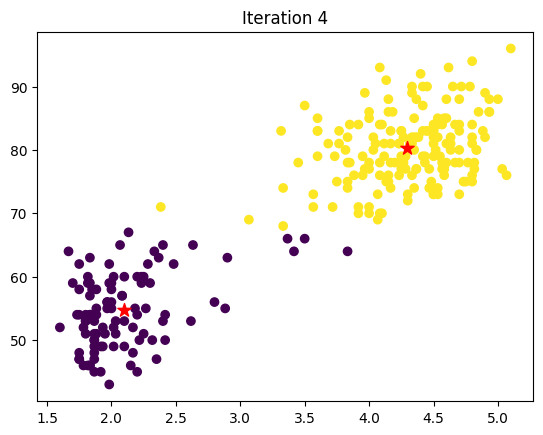

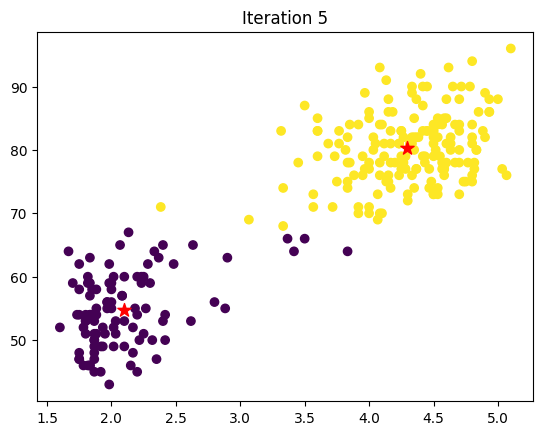

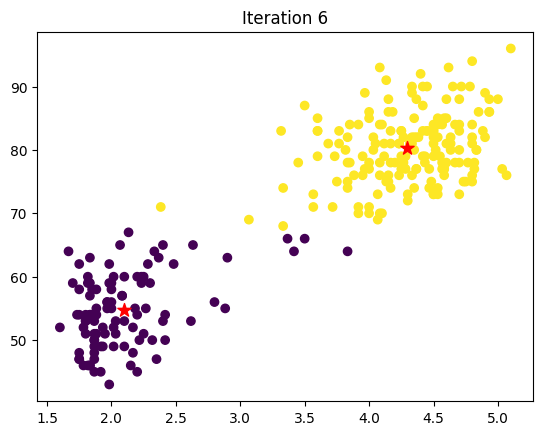

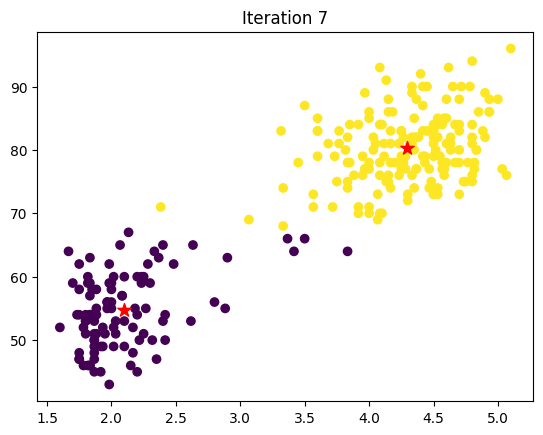

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Extract the eruption time and waiting time columns
X = np.array(df[['eruptions', 'waiting']])

# Set the number of clusters
k = 2

# Initialize the cluster centers randomly
cent = np.random.uniform(low=X.min(axis=0), high=X.max(axis=0), size=(k, X.shape[1]))

# Loop until convergence
for i in range(8):
    # Assign each data point to its nearest cluster center
    dist = np.linalg.norm(X[:, np.newaxis] - cent, axis=2)
    labels = np.argmin(dist, axis=1)

    # Update the cluster centers as the mean of the assigned data points
    for j in range(k):
        cent[j] = np.mean(X[labels == j], axis=0)

    # Plot the current cluster assignments and centers
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(cent[:, 0], cent[:, 1], c='red', marker='*', s=100)
    plt.title('Iteration {}'.format(i))
    plt.show()

Problem 2b 
The above scatter plots indicate the different clusters which are color - coded.

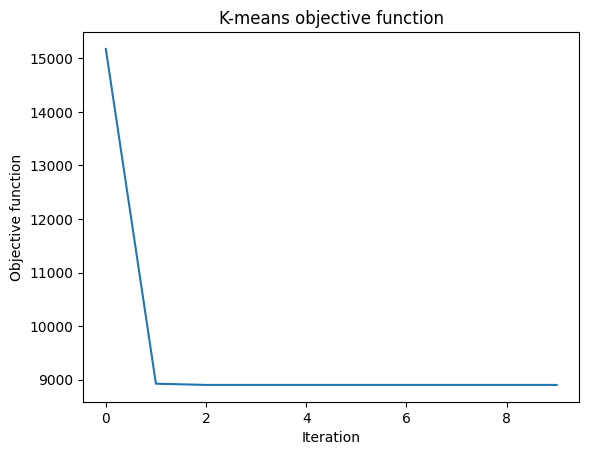

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Extract the eruption time and waiting time columns
X = np.array(df[['eruptions', 'waiting']])

# Set the number of clusters
k = 2

# Initialize the cluster centers randomly
cent = np.random.uniform(low=X.min(axis=0), high=X.max(axis=0), size=(k, X.shape[1]))

# Initialize the objective function list
objectview = []

# Loop until convergence
for i in range(10):
    # Assign each data point to its nearest cluster center
    dist = np.linalg.norm(X[:, np.newaxis] - cent, axis=2)
    labels = np.argmin(dist, axis=1)

    # Update the cluster centers as the mean of the assigned data points
    for j in range(k):
        cent[j] = np.mean(X[labels == j], axis=0)

    # Compute the objective function
    objects = np.sum(dist[np.arange(len(labels)), labels]**2)
    objectview.append(objects)

# Plot the objective function versus iterations
plt.plot(objectview)
plt.xlabel('Iteration')
plt.ylabel('Objective function')
plt.title('K-means objective function')
plt.show()

Problem 2c 
The above graph indicates K-means objective function vs iterations of the algorithm.  

Problem 2d
The method managed to find the clusters that we identified in problem 1. 
